# Exploração - Wikipedia

In [3]:
from repository.mongo_utils import get_pages_content_collection
from repository.wikipedia import WikipediaRepo

wikipedia_repo = WikipediaRepo(collection=get_pages_content_collection())

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

### Obter todas as páginsa

In [4]:
pages = wikipedia_repo.find_all()

In [9]:
pages_df = pd.DataFrame(pages)
pages_df = pages_df.drop(['_id', 'ns', 'type', 'download', 'categories', 'wikitext'], axis='columns')
pages_df.head()

,pageid,title,country,text
0,22911,Geografia da Argentina,Argentina,"<div class=""mw-parser-output""><style data-mw-d..."
1,1996157,Banco Namuncurá,Argentina,"<div class=""mw-parser-output""><style data-mw-d..."
2,1393635,Campo de gelo do sul da Patagónia,Argentina,"<div class=""mw-parser-output""><style data-mw-d..."
3,3425259,Cerro de la Gloria,Argentina,"<div class=""mw-parser-output""><style data-mw-d..."
4,1753443,Chaco Austral,Argentina,"<div class=""mw-parser-output""><div style=""righ..."
...,...,...,...,...
2247,2195062,Batalhão Mariposa,Estados Unidos,"<div class=""mw-parser-output""><p>O <b>Batalhão..."
2248,5583852,Gold Country,Estados Unidos,"<div class=""mw-parser-output""><style data-mw-d..."
2249,3495353,Guerras da Água na Califórnia,Estados Unidos,"<div class=""mw-parser-output""><div class=""thum..."
2250,1165920,Rio American,Estados Unidos,"<div class=""mw-parser-output""><style data-mw-d..."


### Contagem de posts

In [10]:
print(f'Foram encontradas {len(pages_df)} páginas com contéudo')

Foram encontradas 2252 páginas com contéudo


## Exploração antes da limpeza

### Tamanho médio dos documentos

In [14]:
def describe_lengths(lenghts):
    print("Measures of Central Tendency")
    print("Mean =", np.mean(lenghts))
    print("Median =", np.median(lenghts))
    print("Measures of Dispersion")
    print("Minimum =", np.amin(lenghts))
    print("Maximum =", np.amax(lenghts))
    print("Range =", np.ptp(lenghts))
    print("Varience =", np.var(lenghts))
    print("Standard Deviation =", np.std(lenghts))

In [19]:
text_lengths = pages_df['text'].apply(len)
pages_df['raw_length'] = text_lengths

Algumas considerações

- Tamanho mínimo de 799 incluindo tags html indica que pode haver documentos muito pequenos
- Desvio padrão maior que a média indica que pode haver uma variação muito grande nos tamanhos dos documentos
    * Verificar quantiles para ver a variação por quartis

In [15]:
describe_lengths(text_lengths)

Measures of Central Tendency
Mean = 34514.03285968029
Median = 30754.0
Measures of Dispersion
Minimum = 799
Maximum = 753196
Range = 752397
Varience = 1405580144.044213
Standard Deviation = 37491.067523401


In [17]:
np.quantile(text_lengths, [0, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

array([   799.  ,  13731.25,  30754.  ,  41868.25,  60785.2 ,  82336.4 ,
       753196.  ])

#### Verificar distribuição de tamanhos de documentos

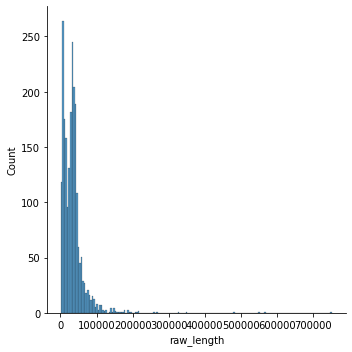

In [20]:
sns.displot(pages_df, x='raw_length')

In [21]:
# Analisar documentos acima de 100000 caracteres
pages_df_acima_100k = pages_df[pages_df['raw_length'] >= 100000]
pages_df_acima_100k.shape

(69, 5)

## Limpeza de dados

In [33]:
from limpeza.limpeza_texto import remover_html_tags

import re

In [31]:
texts = pages_df['text'].values
texto = texts[0] 


In [95]:
t = remover_html_tags(texto)
t = re.sub('body\.skin\-[a-z]+ ', '', t)
t = re.sub('.mw\-parser-[a-z]+ ', '', t)
t = re.sub('t[hd]\.mbox\-[a-z]+[ ,]', '', t)
t = re.sub('table\.[acfiot]mbox,', '', t)
t = re.sub('table\.[acfiot]mbox\-[a-z]+,', '', t)
t = re.sub('\.[ait]mbox[ ,]', '', t)
t = re.sub('\.mbox\-[a-z]+[ ,]', '', t)
t = re.sub('\.tmbox\.mbox\-[a-z]+[ ,]', '', t)
t = re.sub('\.mediawiki ', '', t)
t = re.sub('\.compact-ambox[ ,]', '', t)

print(f'Tamanho do texto : {len(t)}/{len(texto)}')


Tamanho do texto : 29919/140685


In [96]:
# t = re.sub('td\.mbox\-text\{[.]*\}', '', t)
# t = re.sub('\.compact-ambox[ ,]', '', t)
t

"td.mbox-text{border:none;padding:0.25em 0.9em;width:100%}td.mbox-image{border:none;padding:2px 0 2px 0.9em;text-align:center}td.mbox-imageright{border:none;padding:2px 0.9em 2px 0;text-align:center}td.mbox-empty-cell,td.mbox-empty-cell,td.mbox-empty-cell,td.mbox-empty-cell,td.mbox-empty-cell{border:none;padding:0;width:1px}table.ambox{margin:0 10%;border:1px solid #C7C7C7;border-left:10px solid #93C9FF;background-color:#FAFAFA;box-sizing:border-box}table.ambox+table.ambox+table.ambox+table.ambox+table.ambox+table.ambox{margin-top:-1px}td.mbox-text{padding:0.25em 0.5em}td.mbox-image{padding:2px 0 2px 0.5em}td.mbox-imageright{padding:2px 0.5em 2px 0}table.ambox-notice{border-left:10px solid #93C9FF}table.ambox-speedy{border-left:10px solid #B60000;background-color:#FFEBEB}table.ambox-delete{border-left:10px solid #B60000}table.ambox-content{border-left:10px solid #FFB56B}table.ambox-style{border-left:10px solid #FFE411}table.ambox-move{border-left:10px solid #840084}table.ambox-protecti

In [58]:
t

"td.mbox-text{border:none;padding:0.25em 0.9em;width:100%}td.mbox-image{border:none;padding:2px 0 2px 0.9em;text-align:center}td.mbox-imageright{border:none;padding:2px 0.9em 2px 0;text-align:center}td.mbox-empty-cell,td.mbox-empty-cell,td.mbox-empty-cell,td.mbox-empty-cell,td.mbox-empty-cell{border:none;padding:0;width:1px}table.ambox{margin:0 10%;border:1px solid #C7C7C7;border-left:10px solid #93C9FF;background-color:#FAFAFA;box-sizing:border-box}table.ambox+table.ambox+table.ambox+table.ambox+table.ambox+table.ambox{margin-top:-1px}.ambox .ambox .ambox .ambox .ambox .ambox .ambox .ambox .ambox .ambox td.mbox-text{padding:0.25em 0.5em}.ambox .ambox .ambox .ambox .ambox td.mbox-image{padding:2px 0 2px 0.5em}.ambox .ambox .ambox .ambox .ambox td.mbox-imageright{padding:2px 0.5em 2px 0}table.ambox-notice,table.ambox-notice,table.ambox-notice,table.ambox-notice,table.ambox-notice{border-left:10px solid #93C9FF}table.ambox-speedy,table.ambox-speedy,table.ambox-speedy,table.ambox-speedy,t